# "Training computers to smell: how machine learning and process systems engineering can be used in the fragrance industry. PART 1"
> "Cheminformatics"

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [cheminformatics]
- image: images/robot.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

## 1) Historic perpective.

Our olfactory system have a remarkable capacity to distinguish [about 1 trillion smells](https://science.sciencemag.org/content/343/6177/1370) :open_mouth:! We are usually not thankful for that, but mother nature has given us an enormous gift. It is a product of hundreds of thousands of years of evolution that helped us to survive in less prosper times. It has helped us to find good food, and avoid dangerous situations.

However, modern human badly rely on their nose for the purpose of nutrition. When we go to a market we don't need to smell or taste the food to gather information about it. All information we need is written the plastic packing which involves the food we buy: calories, fat, sugar, expiration date. 

**So what is the role of our nose for the modern human?** **Is It just for us to lay our glasses on? Or hang piercings? Or for us to complain about its irregular shape when taking selfies?**  
You may argue that you could easily survive without your nose and our remaining senses are much more important (vision, hearing, tasting), and I can't disagree. 

It seems that we do not need our nose for surviving nowadays, but good smells can have a **huge influence** on our behaviour and companies take **real** advantage of that when trying to sell you things. Consider a simple product which is an essential part of our daily life (now even more during covid pandemics): **a bar of soup**. There are hundreds of soap brands in a regular market. They all do the cleaning job pretty well. You may have tested a lot of them and I'm pretty sure you finished washing your hands and did not complain about the soap capacity to remove dirt. So what do guide your decision when you buy a bar of soap and other self-care products? 

I can't avoid sharing my experience: I always smell the soap before buying it and I always choose the one with the most pleasant smell. It is one of the only products in the market you can experience before buying and a lot of people take advantage of that. The same is valid for shampoos, deodorants, cosmetics and so on.

The products I mentioned are part of what people call fragranced functional products. They serve a given purpose (cleaning for shampoos) but contain fragrances to either improve customer acceptance or mask unpleasant odours. There are also another class of fragranced products: **Perfumes!**

Unlike shampoos, perfumes have no other purpose than be perceived. The word perfume comes from the Latin phrase, “per” meaning “through” and “fumus” meaning “smoke”. The French later gave the name “parfum” to the smells produced by burning incense. Some perfumes are made to be released in the air and give a confined space a certain olfactory "personality". Similarly, perfumes are also used by humans to give themselves olfactory personality - **with fragrances!**

I have already seen very expensive fragrances in a mall and I always asked myself how can people pay so much just to have that mixture of molecules being released from their skin? The fact is that people value good smells and willing to pay even hundreds of dollars for a bottle of a perfume which has made the flavour and fragrance a [multibilion-dollar business](https://blog.technavio.com/blog/top-10-flavors-and-fragrances-companies-world)! :moneybag: 

## 2) Chemistry and biology of smelling.

I have been thinking and working with all that stuff in the past year (I will detail it later), but only **recently** I have asked my self: **what makes a molecule to smell bad or good or to be odourless instead?**

The first thing we should consider is how smelling happens in our body. Here I will provide a very simplified explanation of it. I mean simple because a scientist (Linda Buck) [received a Nobel Prize in 2014](https://www.nobelprize.org/womenwhochangedscience/stories/linda-buck) for detailing our olfactory system. 

The sense of smell is built by cooperation between our nose and our brain. When a chemical component is present in the air and we sniff it, the chemical travel through our nostrils and reach our olfactory receptor cells in the nasal epithelium. If any of the receptor cells is "receptive" to that chemical and it is present in a detectable amount, it will send an electrical signal for our brain through our neurons. That signal is then processed by our brain creating the conscious experience of smell. Here is a picture I took from the web to summarize it.

<img src="my_icons/sniff.jpg" alt="https://qbi.uq.edu.au/blog/2018/11/how-do-we-smell-things#" style="width: 300px;"/>

Now we have a general understanding of how we smell. We can verify that our nose is only responsible for collecting molecules in the air, but the **actual experience of smelling happens in our brain.** 

It is a very interest finding from a biological perspective, but there is also the **chemical** perspective, i.e, does the chemical structure of a molecule give hints of its odour properties? 

Let's consider the two simple molecules: water and ethanol. Water is an odourless chemical (at least for me) while ethanol has a very unpleasant smell (at least for most people I know) even in small concentrations. The clues of why water is odourless and ethanol is not may be hidden in their chemical structure. 

Let's check it out. I have provided a molecular representation of water and ethanol below.

In [2]:
#hide_input
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

| Water                                                 | Ethanol                                                 |
|-------------------------------------------------------|---------------------------------------------------------|
| <img src="my_icons/water.jpg" style="width: 120px;"/> | <img src="my_icons/ethanol.jpg" style="width: 90px;"/> |

 I have circled the part of the molecules that are different. As you see, ethanol is water with the hydrogen replaced by
 -CH2CH3! Ethanol is **CH2CH3**-OH and water is **H**-OH. This small change in the structure is sufficient to make ethanol to have an unpleasant smell.
 
**By looking at this example, one may think we could derive simple rules like adding a CH2CH3 make a molecule to have an unpleasant smell. This is a great strategy and it is exactly what the field of cheminformatics attempts - unravel the rules that govern the relationship between molecular structure and their properties(odour properties in our case)**

However, people who research it does not do it by looking at a few molecules and their descriptors. They gather a huge database of molecules and their properties and set up computer algorithms to figure out the rules – That's one of the ways  **Machine Learning** can be used!

## 3) Cheminformatics for fragrances.

Now I will restrict the remaining part of this post to discuss the relation of molecular structure to their "odour properties", especially to the case of chemicals used to formulate perfumes.

Perfumes are a liquid mixture of chemical components designed to cause a desired olfactory impression when released in the air. Thus, the first step to create a perfume is selecting chemicals that "have" an odour characteristic. Perfumers (people who make perfumes) use semantic descriptors to classify perfume ingredients. "Semantic descriptors" are just a fancy way to say "words". So, perfumers use words to classify perfume ingredients. Let me give you an example I took from [this website](http://www.thegoodscentscompany.com/) that contains a list of hundreds of perfume ingredients.   

In [31]:
#hide_input
smiles = ['COC(OC)c1ccccc1','CCCC(C)=O']
mols = [Chem.MolFromSmiles(molecule) for molecule in smiles]
for m in mols: tmp=AllChem.Compute2DCoords(m)
#AllChem.Compute2DCoords(molecule)S

In [50]:
img = Draw.MolsToGridImage(mols[:8],molsPerRow=2,subImgSize=(500,500),legends= ['Name: dimethoxymethylbenzene \n odor:Green, winey, fruity and sharp with a floral nuance ',
                                                                          'Name: pentan-2-one, \n odor: sweet, fruity, ethereal, wine, banana, woody'])    

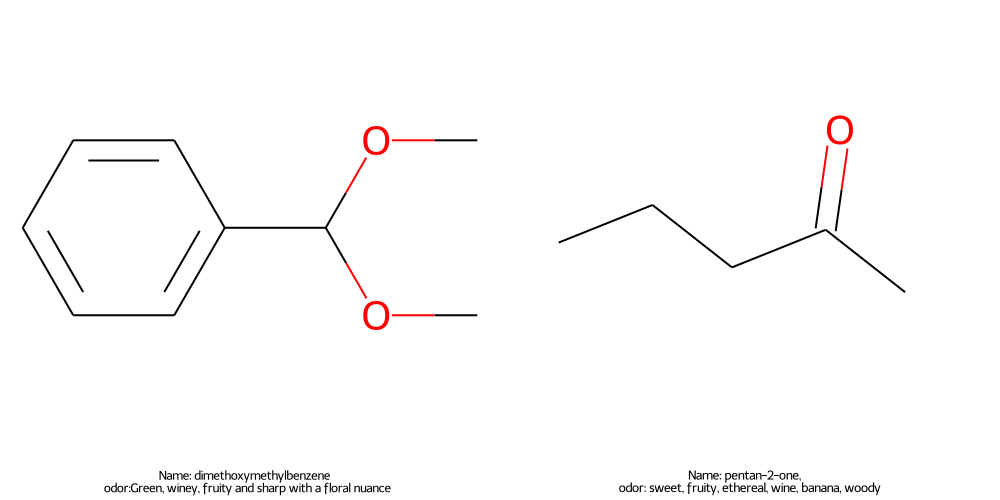

In [51]:
display(img)

As we can see, perfumers use words like "Green", "fruity", "Ethereal", "Wine", "Woody" and "Floral" to describe fragrance ingredients. It can be very challenging to identify rules just by looking at them and figure out what part of the molecular structure makes it to be described as "Fruity" for instance. 

Fortunately, there are free access databases containing thousands of such molecules and their odour descriptors. One of the key steps in this journey is figuring out how to represent molecules with useful numbers. By doing that, we can compare how "similar" are two molecules. Let me illustrate it.

Suppose we figured out a way to represent a molecule with two numbers. The table below shows some numbers I created to illustrate the concept. There are 3 hypothetical molecules, their numeric representation and their odour descriptors.

| Molecule id | Dimension 1 | Dimension 2 | Odor descriptor |
|:-----------:|:-----------:|:-----------:|:---------------:|
|      1      |      1      |      3      |      Fruity     |
|      2      |     3.5     |      2      |      Fruity     |
|      3      |      4      |      -2     |      Woody      |

If we plot each molecule as vectors in a chart and colour them according to their descriptor, we would get something like you to see below. You can observe that the arrows of molecules with "fruity" odour are much closer to each other than they are from molecule 3 (Woody odour). The word "closer" here have a mathematical meaning, so we can actually calculate the distance between two of those arrows with Pythagoras theorem!

<img src="my_icons/vector.png" style="width: 600px;"/> 

The purpose of the table and the chart is to illustrate the following concept: **for the numbers describing the molecules to be useful, they must make molecules with the same descriptors close to each other and far from the other descriptors!**

## 4) Conclusions

In this post, I gave an introduction to how machine learning can be used to find useful relationships between molecular structure and their odour descriptors. 

In the **PART 2** of this series of posts, I will show actual hands-on data science workflow for building a fully functional algorithm that can predict fragrance descriptors using their molecular structure!

In **PART 3**  I will show how chemical engineering can be used to choose the composition of the fragrance ingredients once we have already chosen them! 